# Tests for Portfolio VaR Functions

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES
import data_download as dd
import data_download_2 as dd2

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [56]:
# Set parameters
confidence_level = 0.99
holding_period = 1

First is with past data download function, second is with the second version.

In [57]:
# # Step 1: Define tickers and shares
# tickers = [
#     "AAPL", "MSFT", "NVDA", "GOOGL", "JPM",
#     "UNH", "KO", "PEP", "BMW.DE", "NESN.SW",
#     "NOVN.SW", "ASML.AS"
# ]

# # Assign number of shares per asset
# shares = pd.Series(10, index=tickers)

# # Step 2: Download adjusted prices
# prices = dd.get_raw_prices(tickers, start="2022-01-01")

# # Step 3: Compute monetary positions
# position_data = prices * shares

# # Step 4: Convert positions to CHF
# position_data = dd.convert_to_base(position_data, base="CHF")

# # Step 5: Compute returns and summary stats
# returns, mean_returns, covariance_matrix = dd.compute_returns_stats(position_data)

# # Step 6: Display results
# print(f"\nPortfolio final value in CHF: {position_data.sum(axis=1).iloc[-1]:.2f}")
# print("\nSample of daily returns:\n", returns.head())
# print("\nMean returns (daily, in CHF):\n", mean_returns)
# print("\nCovariance matrix (in CHF):\n", covariance_matrix)


In [58]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": 12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Step 1–2: Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd2.get_raw_prices(tickers, start="2022-01-01")

# Step 3: Convert prices to base currency (e.g. CHF)
prices_converted = dd2.convert_to_base(prices, base="CHF")

# Step 4: Create portfolio with monetary positions
position_data = dd2.create_portfolio(prices_converted, shares)

# Step 5: Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd2.compute_returns_stats(position_data)

# Step 6: Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFUSD=X, CHFEUR=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 10102.51

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [59]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1631.339853,1405.115197,-229.284607,789.596759,938.395511,588.583247,1484.853865,23.019711,97.372501,219.371740,717.262177,1747.324551
2022-01-04,1621.859348,1365.094985,-236.608525,791.852592,980.756962,602.579438,1469.562655,23.069591,97.542194,214.806067,723.304304,1719.635911
2022-01-05,1575.073415,1338.897954,-240.794360,753.781242,960.603751,606.174116,1409.886915,22.446088,98.305870,201.973961,724.092283,1711.437214
2022-01-06,1550.775080,1319.233572,-241.675322,754.601397,972.059817,603.759832,1400.547284,22.396207,98.911938,206.439367,725.191596,1643.512523
2022-01-07,1559.092981,1335.918313,-240.814400,753.880546,985.982071,604.994997,1407.386474,22.171748,99.069534,200.491147,729.283190,1611.858484


In [60]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [61]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,279.293769,416.280817,136.987048
2022-01-05,271.801440,405.922545,134.121105
2022-01-06,268.878698,401.158273,132.279575
2022-01-07,269.318288,401.624428,132.306141
2022-01-10,266.950842,397.390213,130.439371


### Marginal VaR

In [62]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [63]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.036692,0.032825,0.011721,0.037143,0.025377,0.013988,0.035331,0.004363,0.004017,0.055650,0.014273,0.023452
2022-01-05,0.036606,0.032760,0.011676,0.036953,0.025399,0.014098,0.035189,0.004411,0.004088,0.055318,0.014390,0.023716
2022-01-06,0.036659,0.032795,0.011686,0.037063,0.025487,0.014087,0.035270,0.004400,0.004067,0.055533,0.014379,0.023456
2022-01-07,0.036693,0.032965,0.011759,0.037082,0.025526,0.014071,0.035294,0.004410,0.004068,0.055559,0.014357,0.023255
2022-01-10,0.036777,0.032217,0.011521,0.037161,0.025591,0.014177,0.035342,0.004378,0.004048,0.055392,0.014490,0.023542


### Incremental, Component and Relative Component VaR

In [64]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [65]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,59.509161,44.808615,-2.773174,29.412175,24.888787,8.429084,51.920959,0.100663,0.391790,11.953964,10.323630,40.328114
2022-01-05,57.656449,43.862940,-2.811430,27.854450,24.398256,8.545560,49.612521,0.099001,0.401884,11.172704,10.420000,40.589105
2022-01-06,56.850188,43.264344,-2.824169,27.967493,24.775157,8.505118,49.397873,0.098546,0.402288,11.464183,10.427654,38.550023
2022-01-07,57.208018,44.039119,-2.831796,27.955351,25.168223,8.513086,49.672037,0.097785,0.403043,11.139029,10.470600,37.483792
2022-01-10,57.185531,40.378192,-2.827621,28.274026,25.186302,8.567458,49.638006,0.095082,0.404290,11.136892,10.543571,38.369113


In [66]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [67]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.213070,0.160435,-0.009929,0.105309,0.089113,0.030180,0.185901,0.000360,0.001403,0.042801,0.036963,0.144393
2022-01-05,0.212127,0.161379,-0.010344,0.102481,0.089765,0.031440,0.182532,0.000364,0.001479,0.041106,0.038337,0.149334
2022-01-06,0.211434,0.160907,-0.010504,0.104015,0.092143,0.031632,0.183718,0.000367,0.001496,0.042637,0.038782,0.143373
2022-01-07,0.212418,0.163521,-0.010515,0.103800,0.093452,0.031610,0.184436,0.000363,0.001497,0.041360,0.038878,0.139180
2022-01-10,0.214217,0.151257,-0.010592,0.105915,0.094348,0.032094,0.185944,0.000356,0.001514,0.041719,0.039496,0.143731


In [68]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [69]:
ivar_series.head()

Date
2022-01-04    328.245404
2022-01-05    327.604802
2022-01-06    327.950601
2022-01-07    329.654277
2022-01-10    322.165444
dtype: float64

### ES Test

In [70]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [71]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.042037,0.037606,0.013428,0.042554,0.029074,0.016026,0.040477,0.004999,0.004602,0.063756,0.016352,0.026868
2022-01-05,0.041938,0.037533,0.013376,0.042336,0.029099,0.016151,0.040315,0.005053,0.004684,0.063375,0.016487,0.027171
2022-01-06,0.041999,0.037572,0.013388,0.042461,0.029200,0.016139,0.040408,0.005041,0.004660,0.063622,0.016474,0.026873
2022-01-07,0.042038,0.037767,0.013472,0.042483,0.029244,0.016121,0.040435,0.005053,0.004661,0.063652,0.016449,0.026642
2022-01-10,0.042134,0.036909,0.013199,0.042574,0.029319,0.016242,0.040490,0.005016,0.004638,0.063460,0.016601,0.026971


In [72]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [73]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,68.177535,51.335641,-3.177127,33.696486,28.514200,9.656902,59.484000,0.115326,0.448860,13.695233,11.827417,46.202489
2022-01-05,66.054948,50.252214,-3.220955,31.911855,27.952216,9.790345,56.839305,0.113422,0.460424,12.800170,11.937825,46.501498
2022-01-06,65.131243,49.566424,-3.235551,32.041364,28.384018,9.744012,56.593391,0.112900,0.460888,13.134107,11.946593,44.165394
2022-01-07,65.541197,50.454056,-3.244288,32.027454,28.834341,9.753141,56.907491,0.112029,0.461752,12.761590,11.995794,42.943850
2022-01-10,65.515434,46.259862,-3.239505,32.392548,28.855053,9.815432,56.868503,0.108932,0.463181,12.759142,12.079395,43.958132


In [74]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [75]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.213070,0.160435,-0.009929,0.105309,0.089113,0.030180,0.185901,0.000360,0.001403,0.042801,0.036963,0.144393
2022-01-05,0.212127,0.161379,-0.010344,0.102481,0.089765,0.031440,0.182532,0.000364,0.001479,0.041106,0.038337,0.149334
2022-01-06,0.211434,0.160907,-0.010504,0.104015,0.092143,0.031632,0.183718,0.000367,0.001496,0.042637,0.038782,0.143373
2022-01-07,0.212418,0.163521,-0.010515,0.103800,0.093452,0.031610,0.184436,0.000363,0.001497,0.041360,0.038878,0.139180
2022-01-10,0.214217,0.151257,-0.010592,0.105915,0.094348,0.032094,0.185944,0.000356,0.001514,0.041719,0.039496,0.143731


In [76]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [77]:
ies_series.head()

Date
2022-01-04    376.059113
2022-01-05    375.325199
2022-01-06    375.721368
2022-01-07    377.673209
2022-01-10    369.093519
dtype: float64

### Visualizations


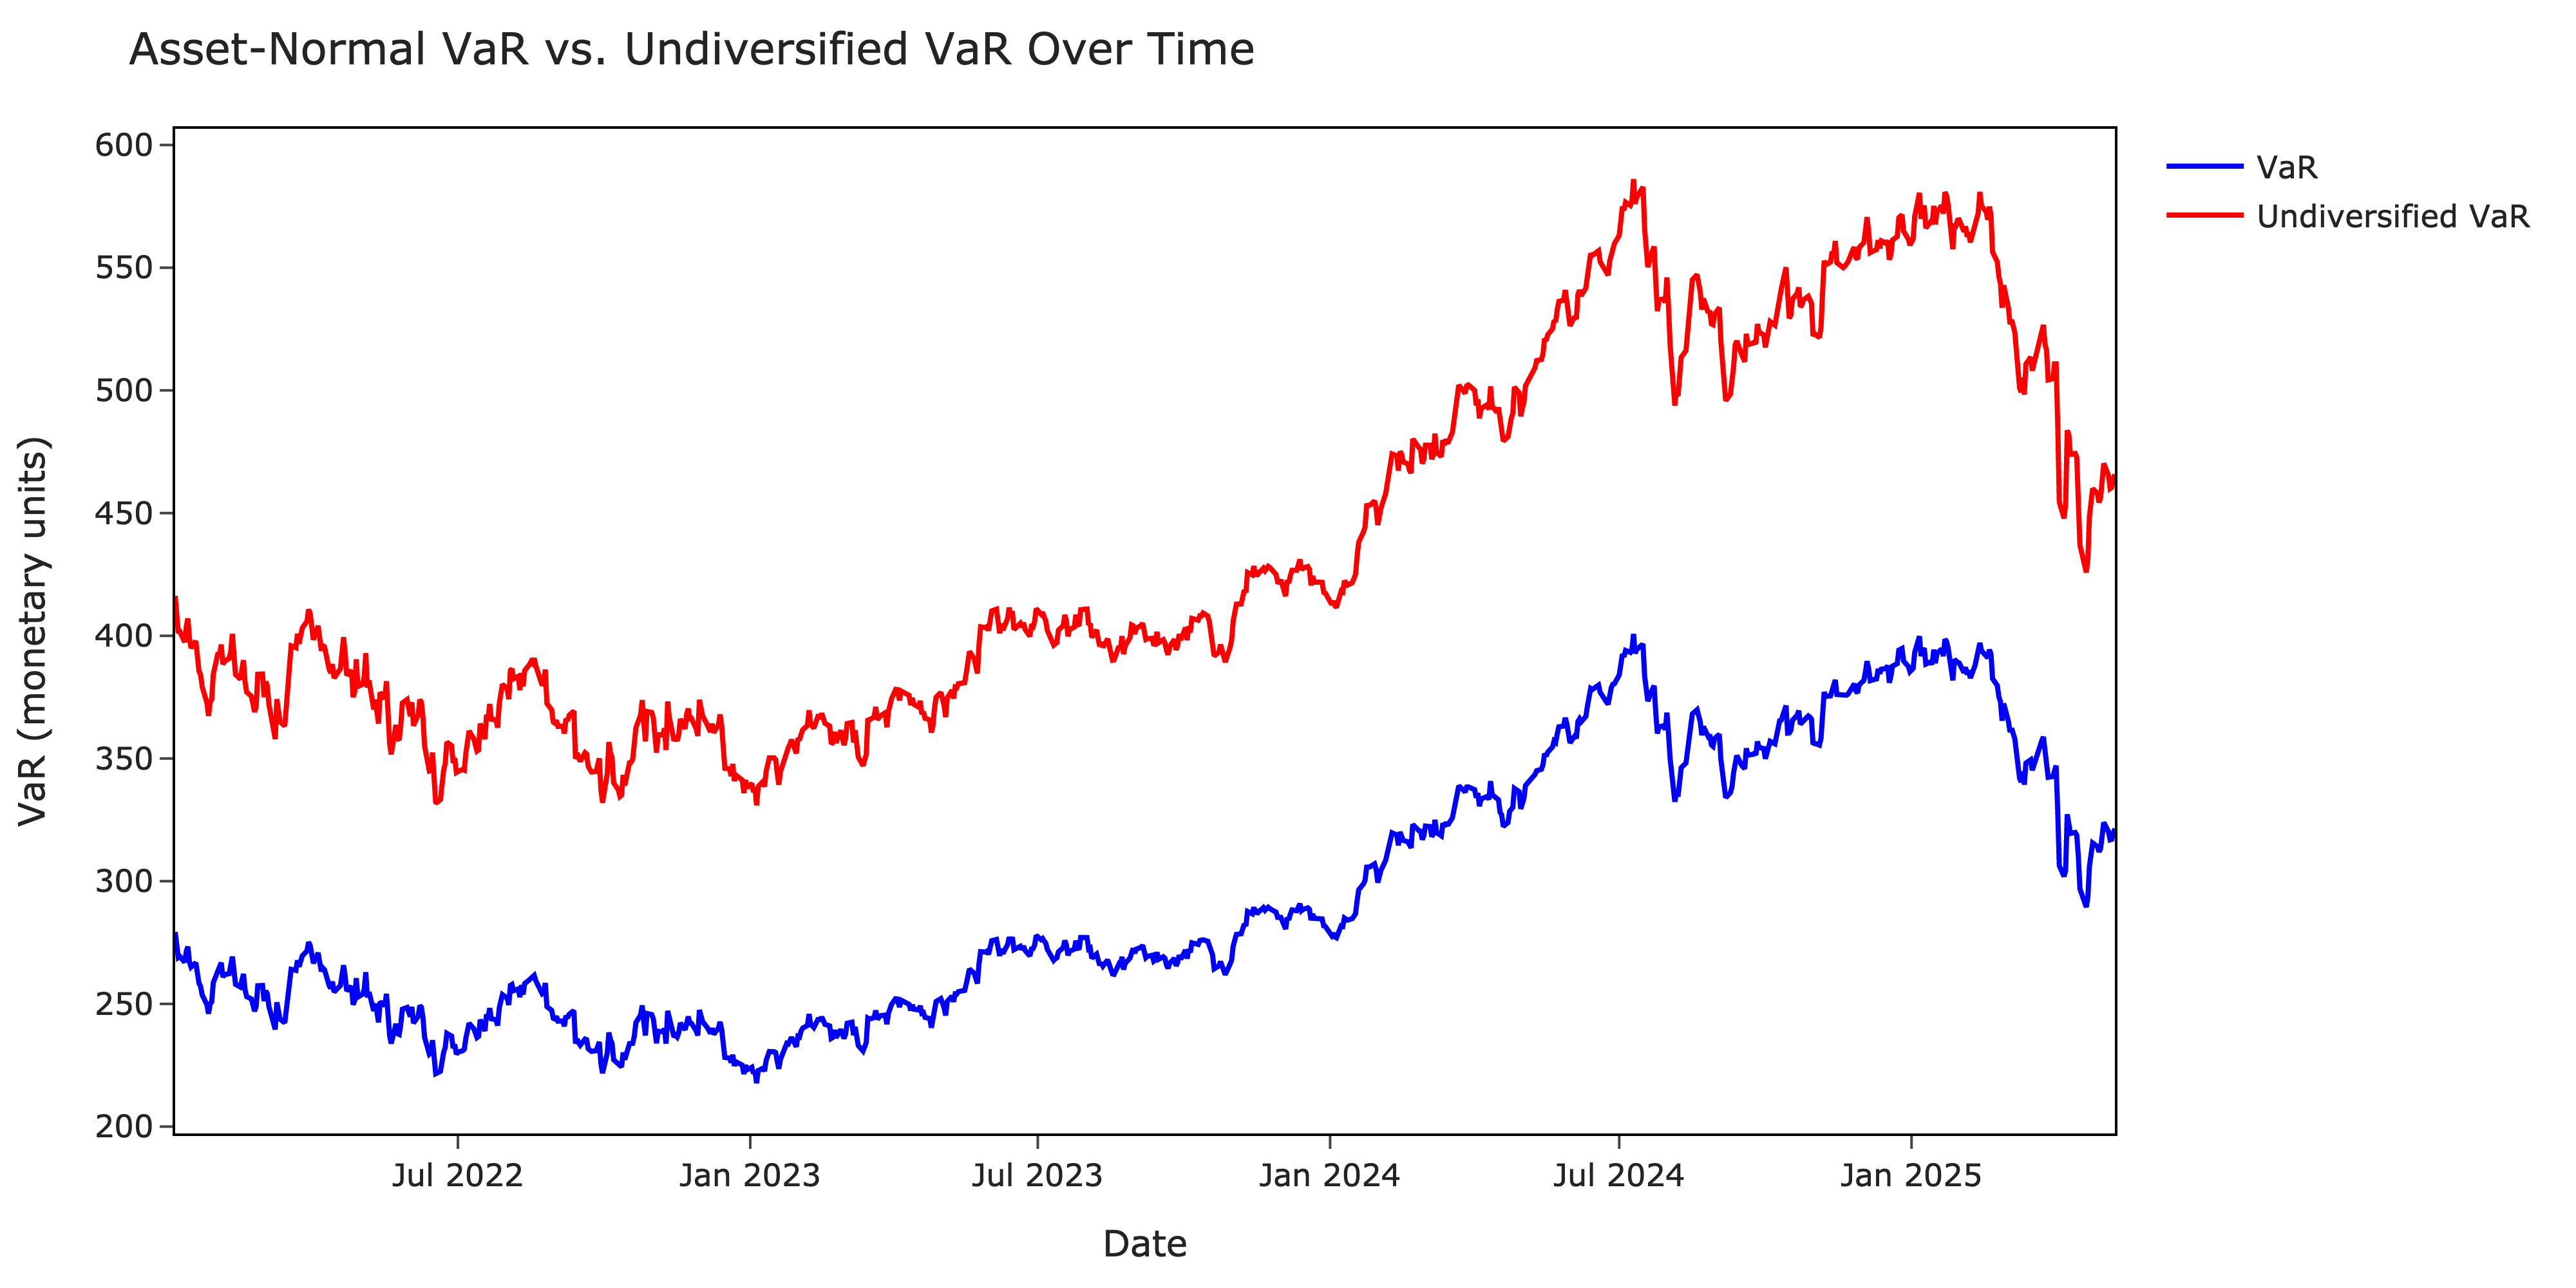

In [78]:
pl.plot_var_series(summary_df, interactive=False)


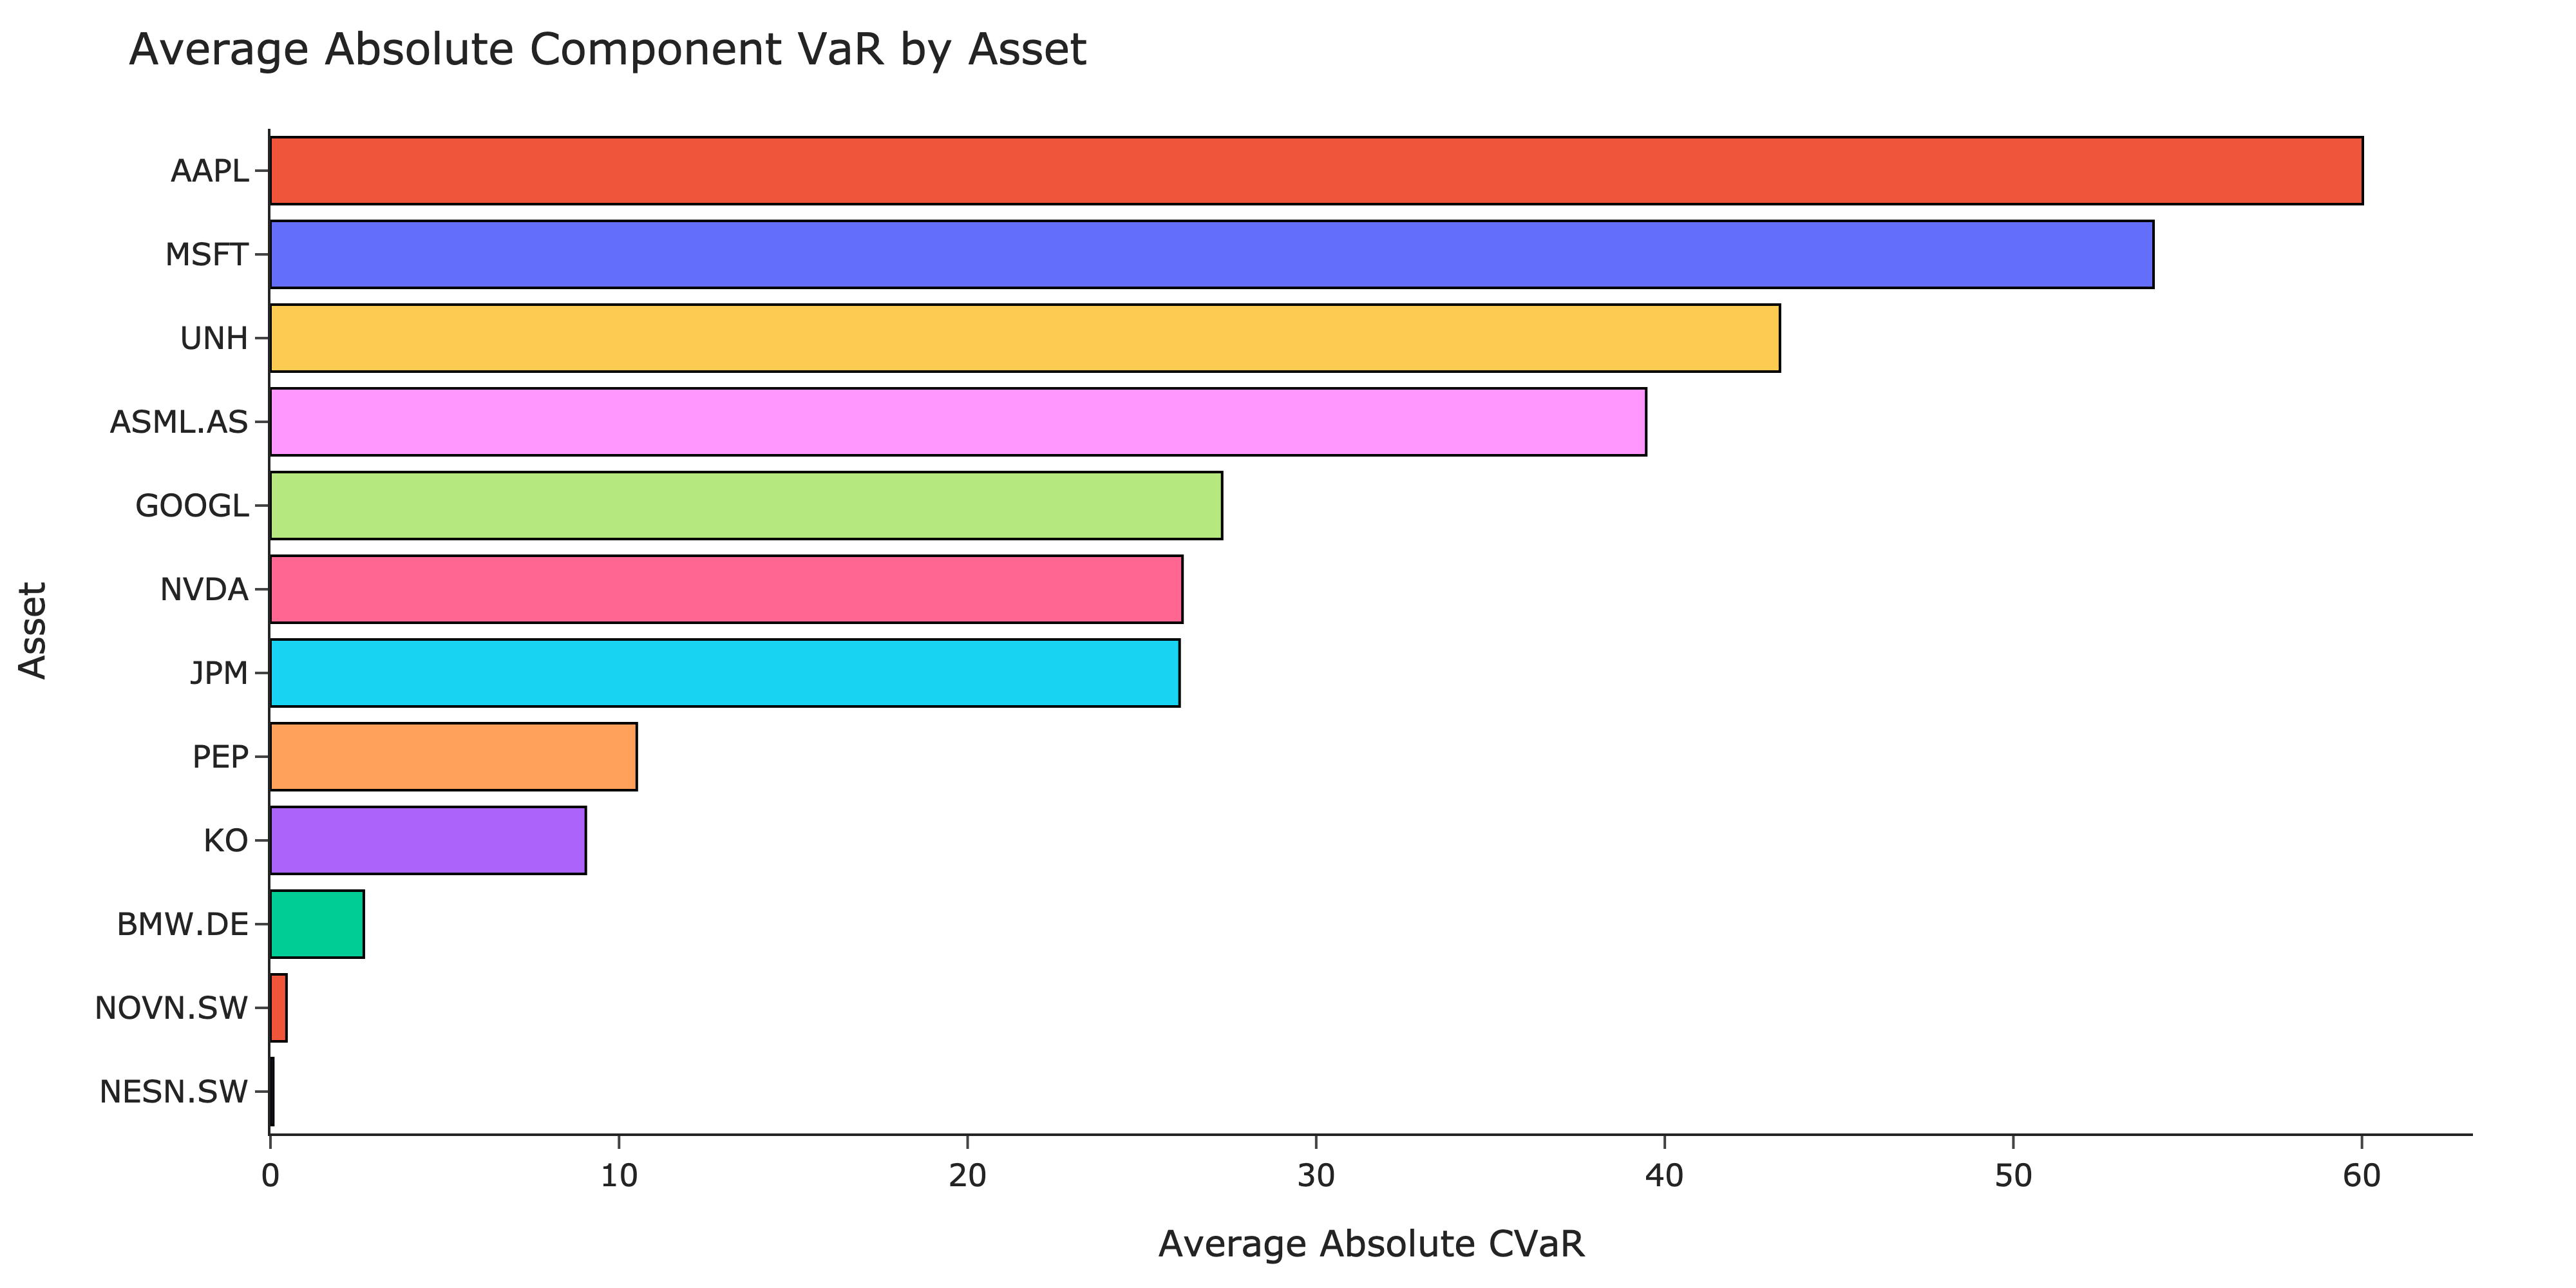

In [79]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


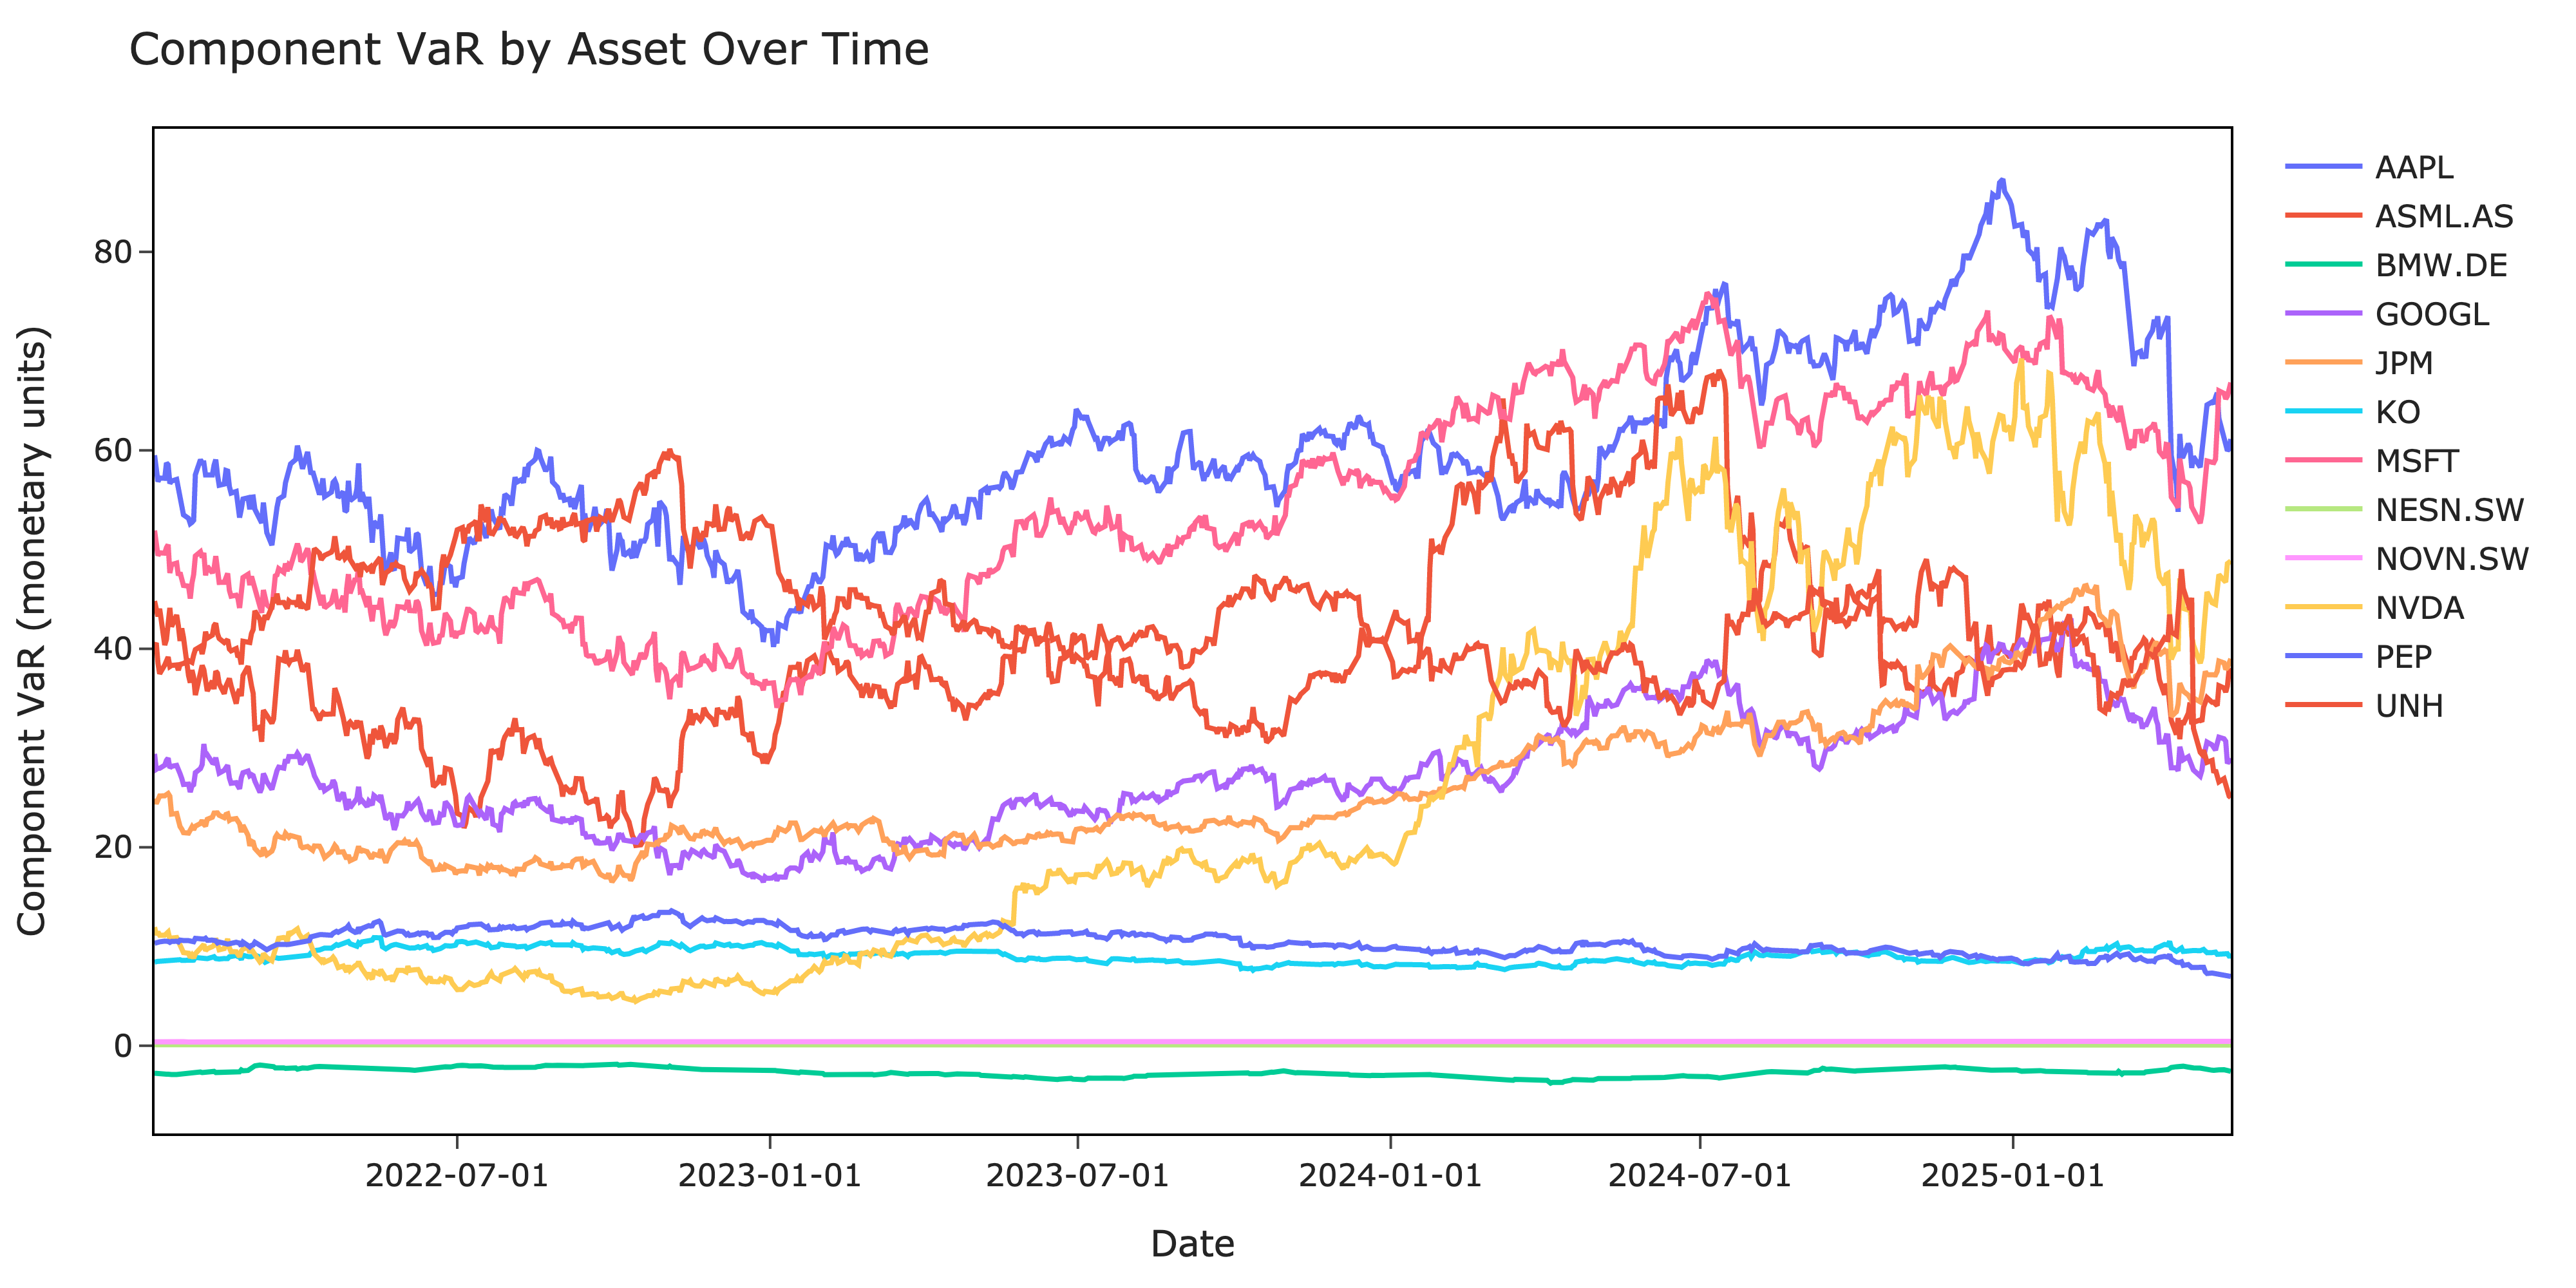

In [80]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


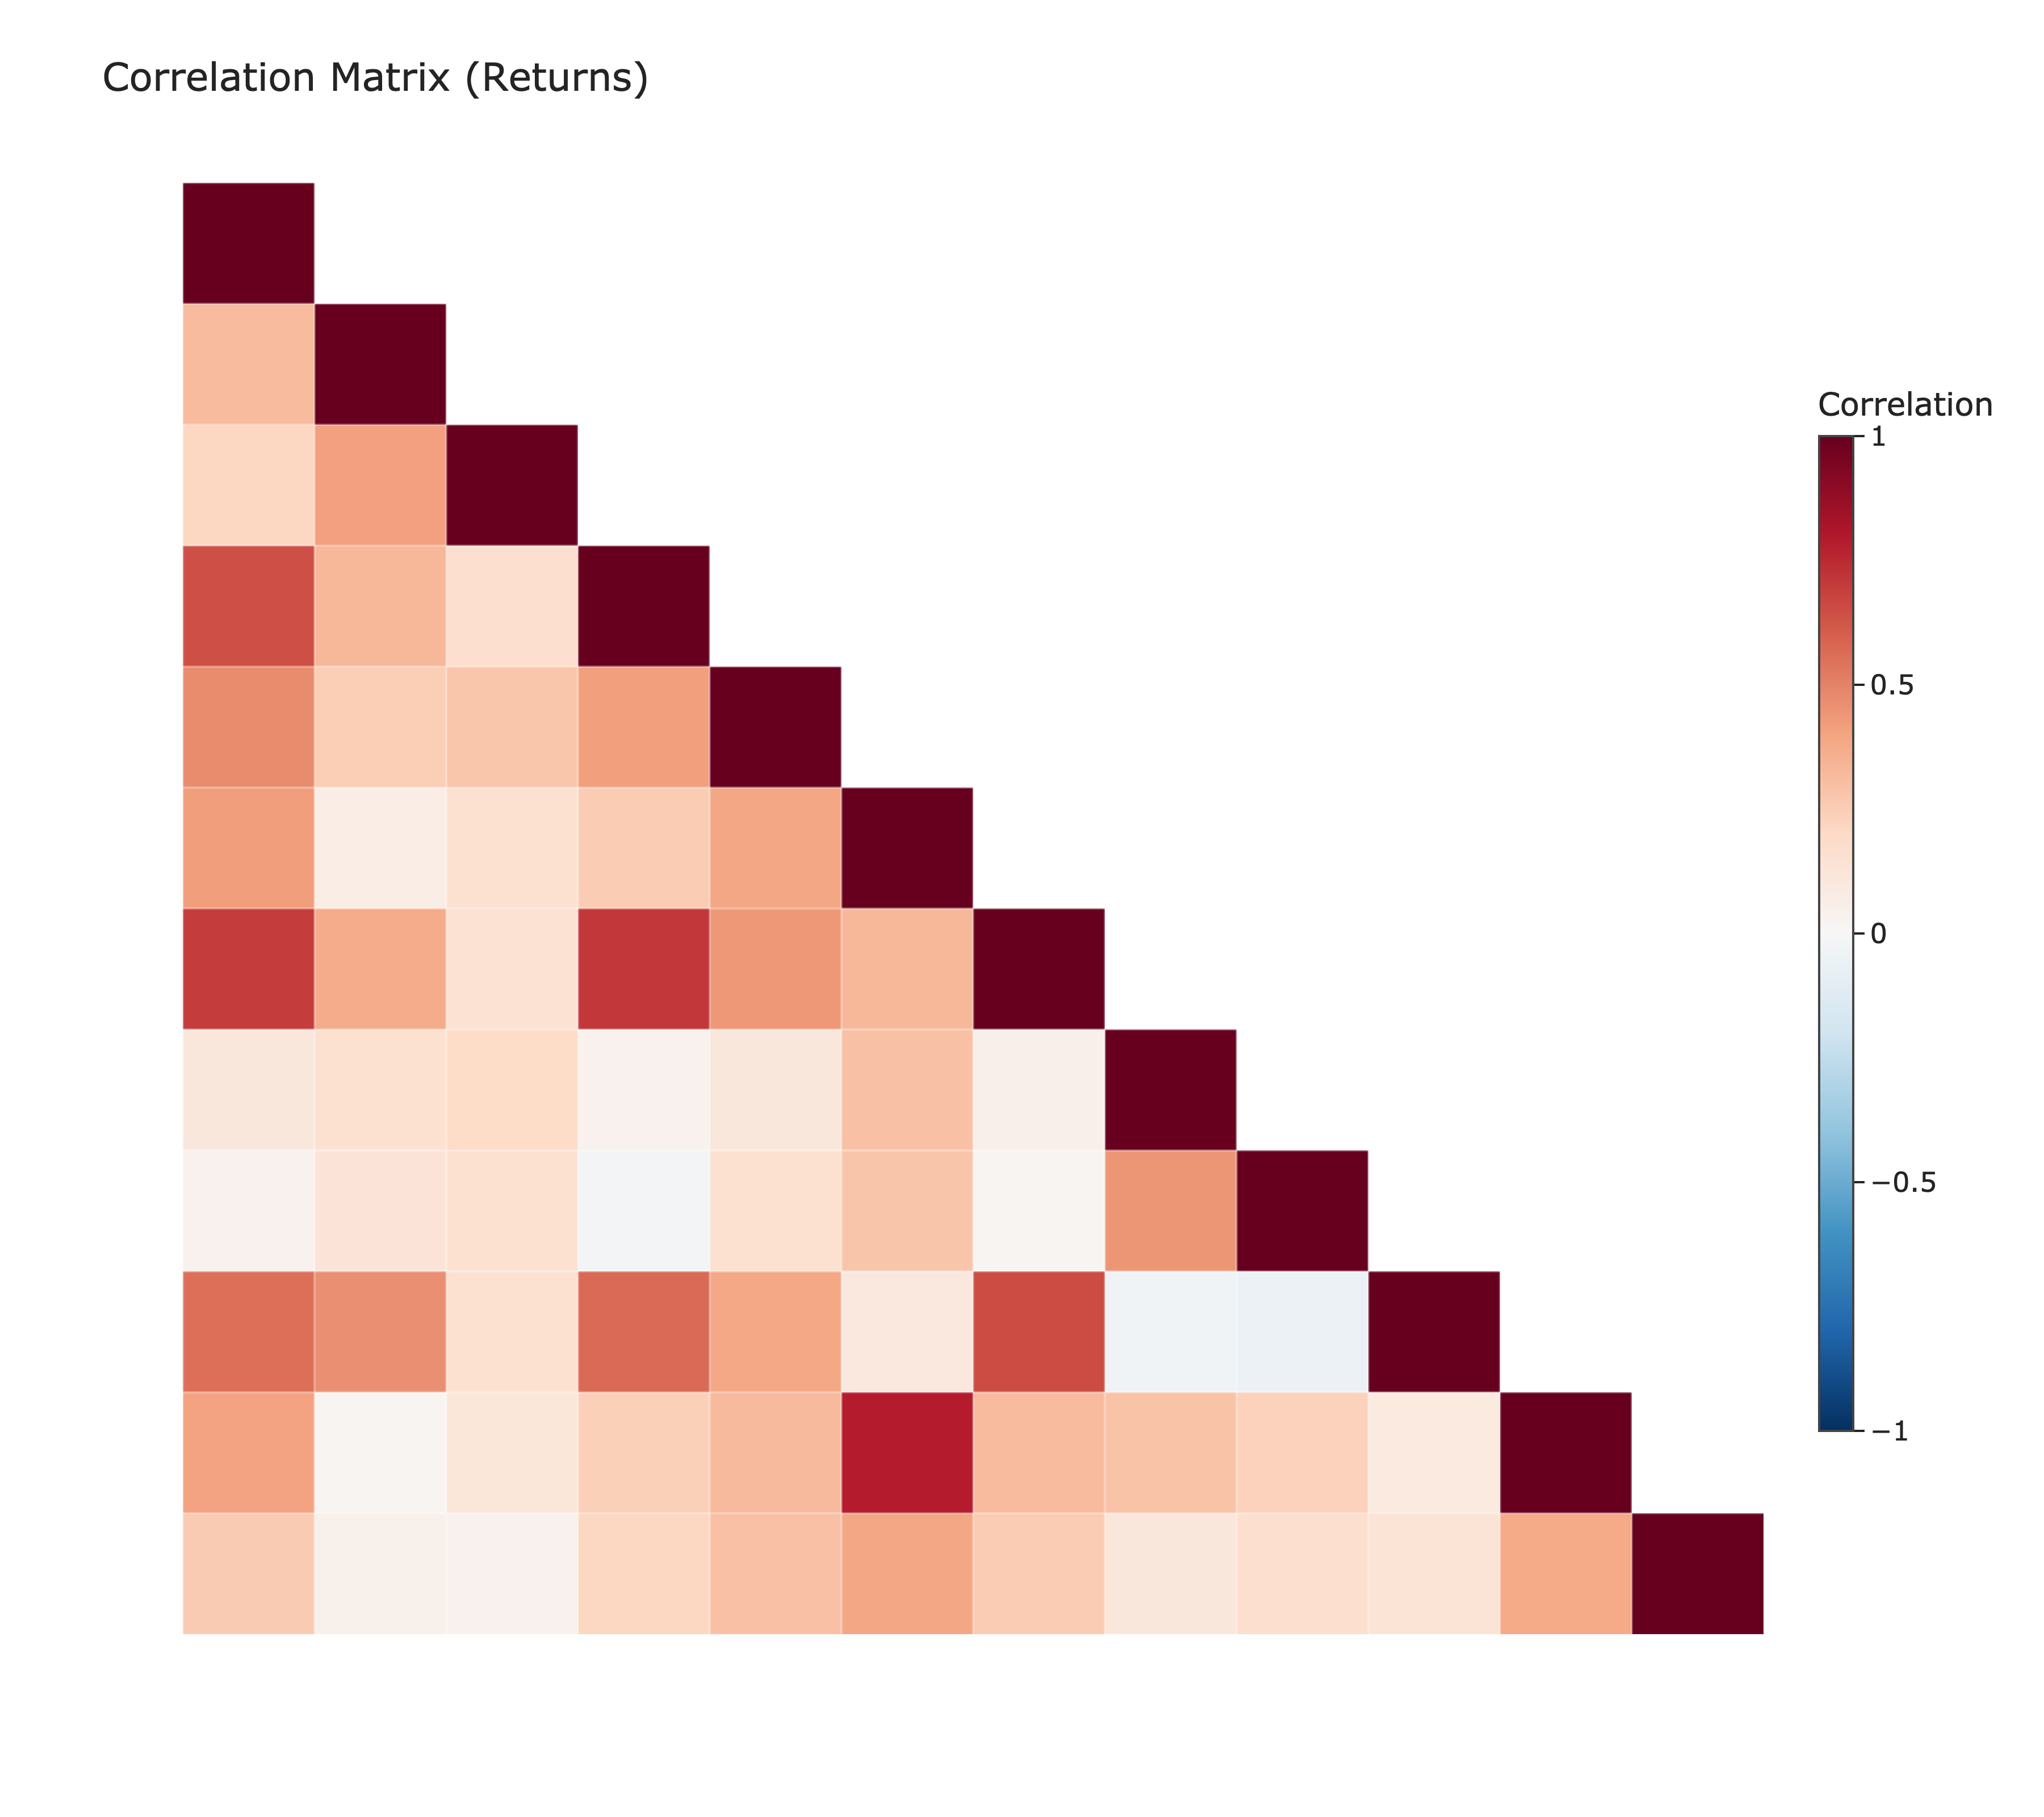

In [81]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.